# Time Series Prediction

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from math import factorial
from pylab import *
from statsmodels.tsa.arima_model import ARIMA
import h5py 
from spectrum import *
%matplotlib inline

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\PRINT\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


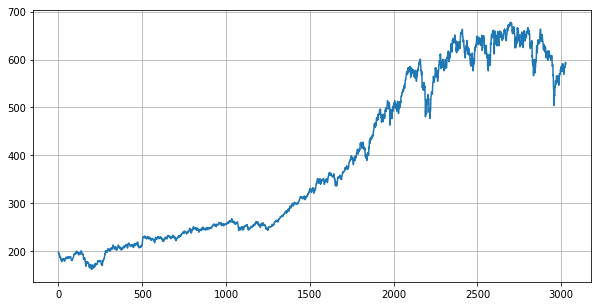

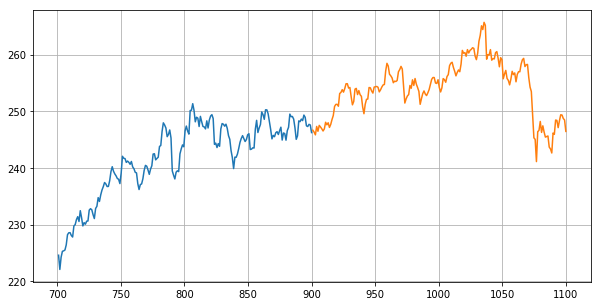

In [2]:
file = h5py.File('nyse.mat','r') 
data = file.get('nyse') #TS containing counts of the NYSE composite index, from 1990 to 2001
nyse = np.array(data)

y = nyse[701:900]
yr = nyse[901:1100]
ty = linspace(701, 900, 199)
tyr = linspace(901, 1100, 199)

plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(nyse)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)

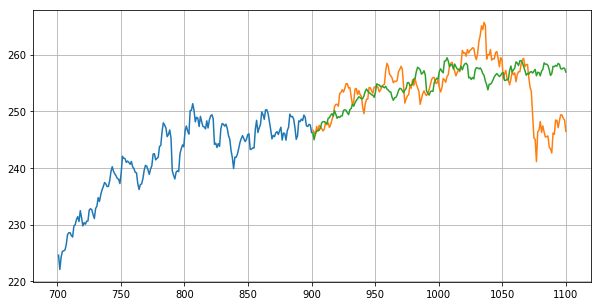

In [12]:
#Average absolute gain method
def average_abs_forecast(x, N):
    ret = np.zeros(N)
    j = 0
    check = 0
    for i in range(701, 900):
        ret[j] = nyse[i] - nyse[i - 1]
        j = j + 1
    sigma = sum((y - np.mean(y)) ** 2) / N
    ro = (sum(ret) ** 2) / 2 * N
    if sigma <= ro:
        check = 1
        forecast = y + 100 * (y[N - 2] - y) / (N - 1) + 10
    return forecast

forecast = average_abs_forecast(yr, 199)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, forecast)

In [13]:
#Forecast accuracy estimate
#если e меньше 10%, то точность прогноза высокая, если е от 10% до 20%, то точность прогноза хорошая,
#если е от20% до 50%, то точность прогноза удовлетворительная, для e больше 50% прогноз не удовлетворителен
forecast_check = (1 / 100) * sum(abs(yr - forecast) / yr) * 100
print("forecast_check = ", forecast_check)

forecast_check =  3.1363484622012474


forecast_check2 =  11.05530054235857


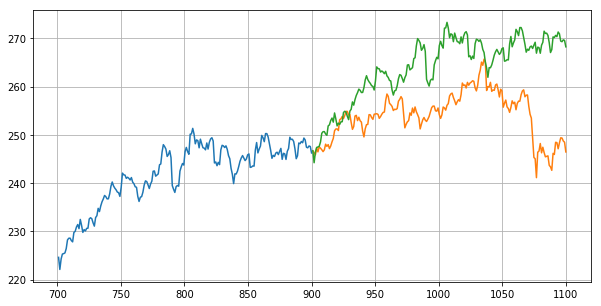

In [15]:
#Average growth rate prediction method
def average_grow_speed_forecast(x, N):
    return x * ((x[N - 2] / x) ** (1 / (N - 1)))

forecast2 = average_grow_speed_forecast(y, 199)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, forecast2 + 22)

forecast_check2 = (1 / 100) * sum(abs(yr - forecast2) / yr) * 100
print("forecast_check2 = ", forecast_check2)

AR_model w1 =  [-0.99525263]
AR_model w2 =  [-1.00107882  0.00585398]
AR_model w3 =  [-1.00106647  0.00374324  0.00210846]


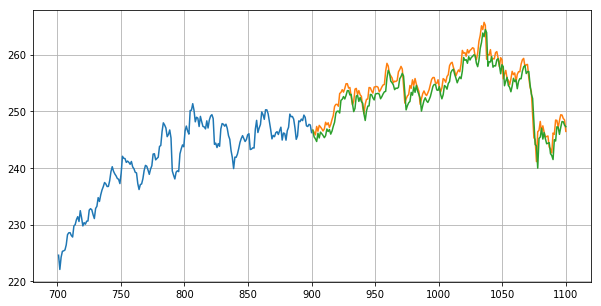

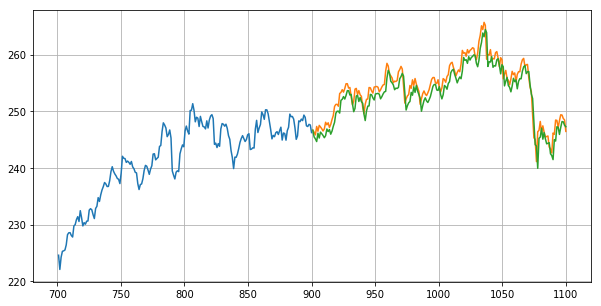

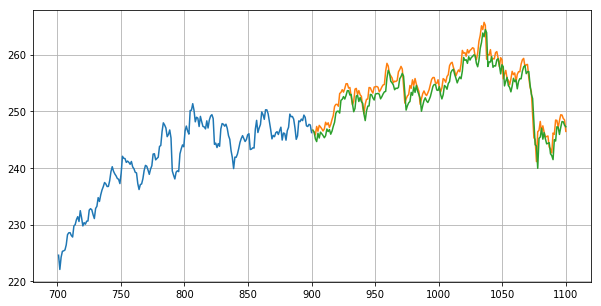

In [16]:
def AR_model(x, N):
    a1, var1, coeff1 = aryule(x, 1)
    a2, var2, coeff2 = aryule(x, 2)
    a3, var3, coeff3 = aryule(x, 3)
    c1 = np.zeros(N)
    c2 = np.zeros(N)
    c3 = np.zeros(N)
    c1[0] = x[0] 
    c2[0] = x[0]
    c3[0] = x[0]
    c3[1] = x[1]
    for i in range(1, N):
        c1[i] = -a1[0] * x[i - 1]
        c2[i] = -a2[0] * x[i - 1] - a2[1] * x[i - 2]
    for i in range(2, N):
        c3[i] = -a3[0] * x[i - 1] - a3[1] * x[i - 2] - a3[2] * x[i - 3]
    return a1, a2, a3, c1, c2, c3

a1, a2, a3, c1, c2, c3 = AR_model(yr, 199)
print("AR_model w1 = ", a1)
print("AR_model w2 = ", a2)
print("AR_model w3 = ", a3)

plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, c1 - 2)

plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, c2 - 2)


plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, c3 - 2)

forecast_check1 =  7.6793387923
forecast_check2 =  6.94247939011
forecast_check3 =  8.01083927823


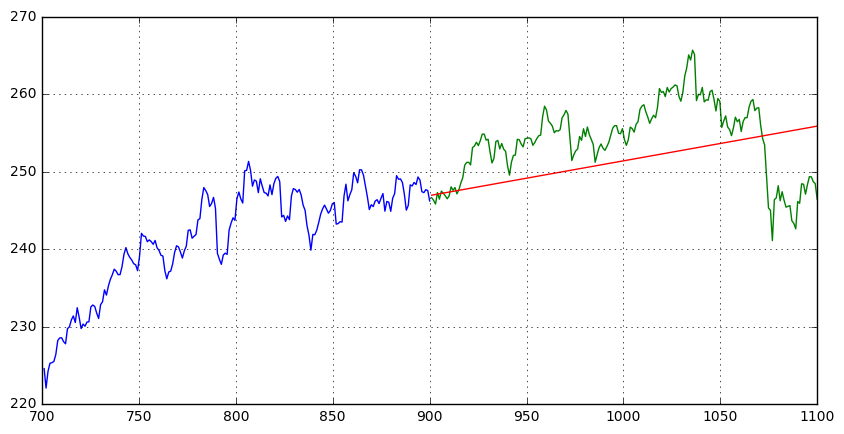

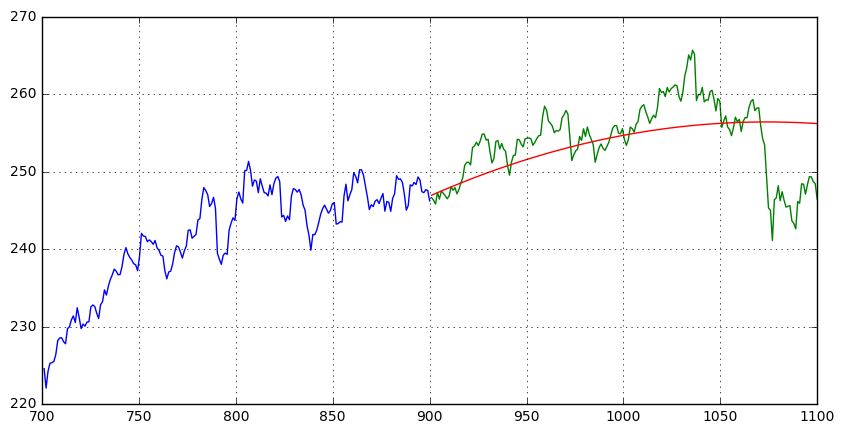

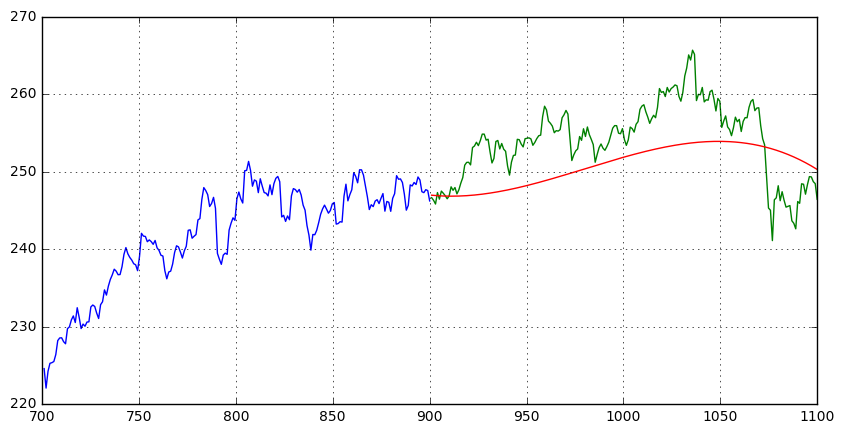

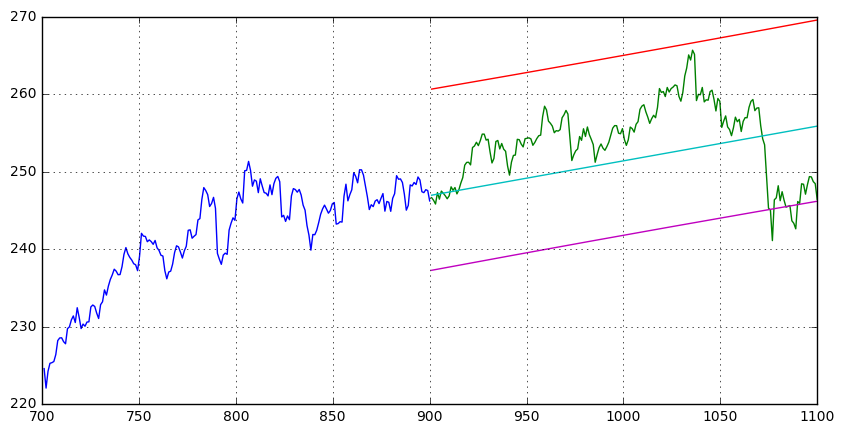

In [39]:
N = 199
tr1 = np.zeros(N)
tr2 = np.zeros(N)
tr3 = np.zeros(N)
for i in range(0, N):
    tr1[i] = 0.045 * i + 249
    tr2[i] = -0.00032 * i ** 2 + 0.11 * i + 249
    tr3[i] = -0.0000055 * i ** 3 + 0.0013 * i ** 2 - 0.025 * i + 249
    
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, tr1 - 2)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, tr2 - 2)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, tr3 - 2)

forecast_check1 = (1 / 100) * sum(abs(yr - tr1) / yr) * 100
print("forecast_check1 = ", forecast_check1 / 100)
forecast_check2 = (1 / 100) * sum(abs(yr - tr2) / yr) * 100
print("forecast_check2 = ", forecast_check2 / 100)
forecast_check3 = (1 / 100) * sum(abs(yr - tr3) / yr) * 100
print("forecast_check3 = ", forecast_check3 / 100)

dov = np.zeros(N)
for i in range(0, N - 1):
    dov[i] = yr[i] - tr1[i]
S = sqrt(sum(dov ** 2) / (N - 2))
dovint = np.zeros(N)
for i in range(0, N):
    dovint[i] = 1.9845 * S * sqrt(1 + 1 / N + ((tr1[i] - np.mean(tr1)) ** 2) / sum((tr1 - np.mean(tr1)) ** 2))

plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(ty, y)
plt.plot(tyr, yr - 2)
plt.plot(tyr, tr1 + dovint)
plt.plot(tyr, tr1 - 2)
plt.plot(tyr, tr1 - dovint)

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  199
Model:                     ARMA(1, 3)   Log Likelihood                -333.410
Method:                       css-mle   S.D. of innovations              1.280
Date:                Tue, 26 Feb 2019   AIC                            678.820
Time:                        11:54:44   BIC                            698.580
Sample:                             0   HQIC                           686.817
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.0739      5.883     40.638      0.000     227.544     250.604
ar.L1.y        0.9875      0.012     81.779      0.000       0.964       1.011
ma.L1.y        0.1058      0.074      1.426      0.1

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


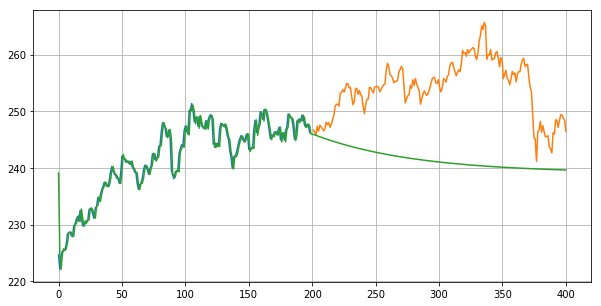

In [17]:
arima = ARIMA(y, order=(1, 0, 3))
print(arima.fit().summary())
predict = arima.fit().predict(start = 0, end = 400)
t2 = linspace(201, 400, 199)
plt.figure(figsize = (10, 5))
plt.grid(True)
plt.plot(y)
plt.plot(t2, yr - 2)
plt.plot(predict) #something goes wrong:(